<a href="https://colab.research.google.com/github/kirwarobert/cnn/blob/main/Ann_sitati_KNN_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
# Install missing package
try:
    from skopt import BayesSearchCV
except ModuleNotFoundError:
    import subprocess
    subprocess.check_call(["pip", "install", "scikit-optimize"])
    from skopt import BayesSearchCV

In [ ]:
try:
    import shap
except ModuleNotFoundError:
    import subprocess
    subprocess.check_call(["pip", "install", "shap"])
    import shap

In [ ]:

    try:
        import lime
        from lime.lime_tabular import LimeTabularExplainer
    except ModuleNotFoundError:
        import subprocess
        subprocess.check_call(["pip", "install", "lime"])
        import lime
        from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# load dataset
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [ ]:
# Display basic info
data.info()
print("\nFirst 5 rows:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB

First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1    

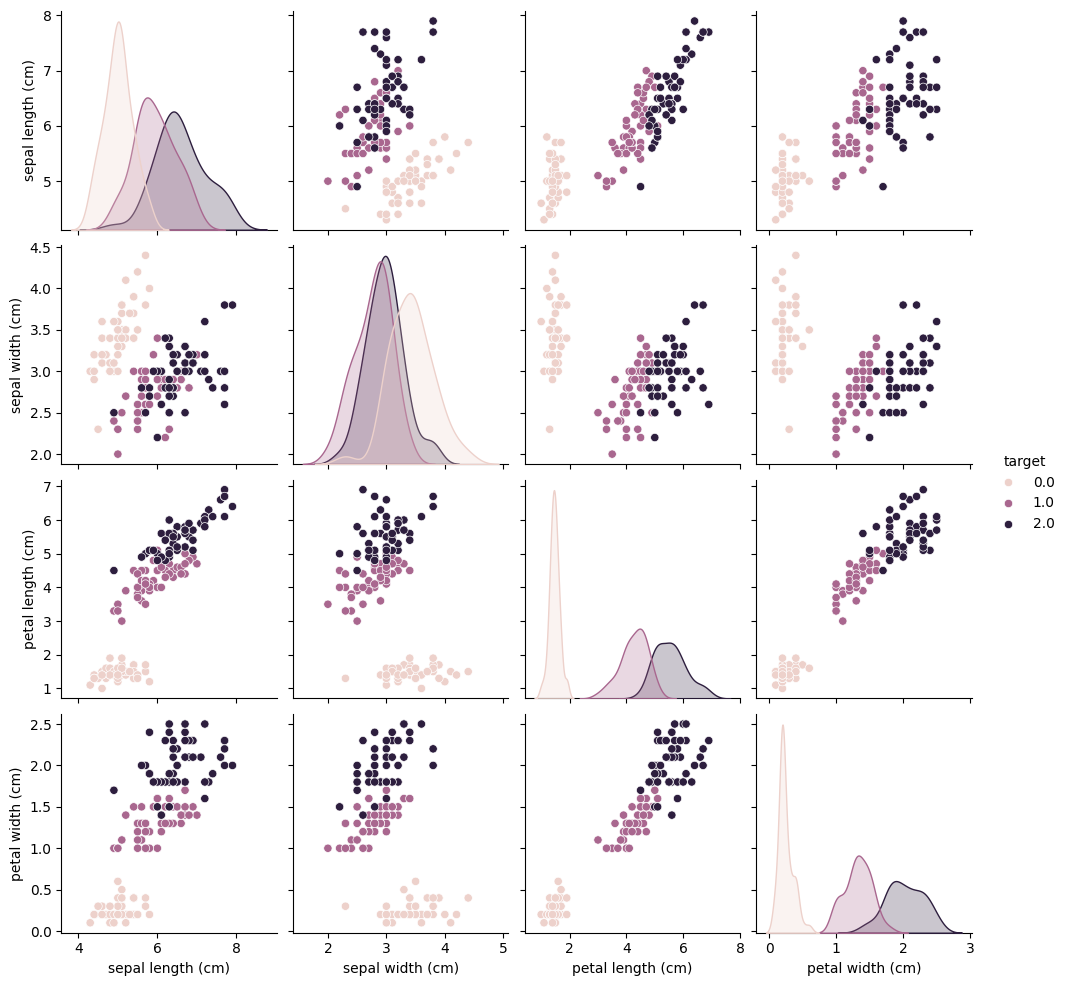

In [ ]:
# Exploratory data analysis EDA
sns.pairplot(data, hue='target', diag_kind='kde')
plt.show()

In [ ]:
# Splitting data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_Scaler = scaler.transform(X_test)


In [ ]:
# train KNN model
K = 5
Knn_model = KNeighborsClassifier(n_neighbors=K)
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# model evaluation
y_pred = Knn_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.36666666666666664

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.00      0.00      0.00         9
         2.0       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30


Confusion Matrix:
 [[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [ ]:
# user input for prediction
print("\nEnter the feature values for prediction:")
user_input = []
for feature in iris.feature_names:
    user_input.append(float(input(f"{feature}:")))

# preprocess input and make prediction
user_input = np.array(user_input).reshape(1, -1)
user_input = scaler.transform(user_input)
prediction = Knn_model.predict(user_input)

print("\npredicted Class:", iris.target_names[int(prediction[0])])


Enter the feature values for prediction:
sepal length (cm):2
sepal width (cm):3.5
petal length (cm):4
petal width (cm):2.5

predicted Class: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


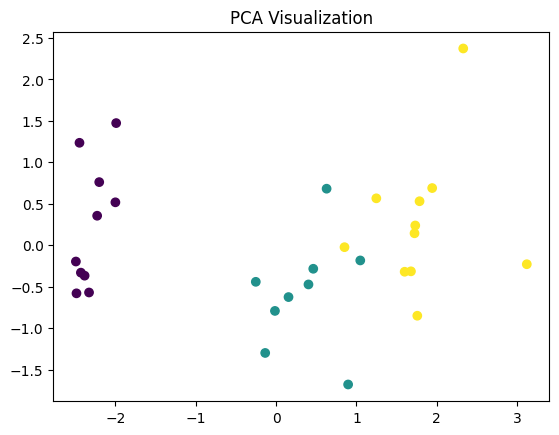

In [ ]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Scaler)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis')
plt.title("PCA Visualization")
plt.show()

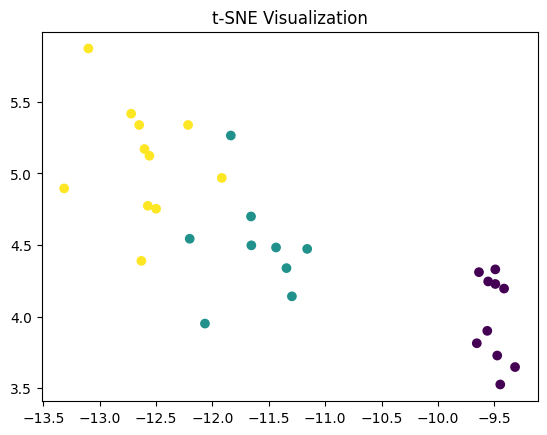

In [ ]:
#t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=20)
X_tsne = tsne.fit_transform(X_Scaler)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='viridis')
plt.title("t-SNE Visualization")
plt.show()

In [ ]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Hyperparameter Tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best GridSearchCV params:", grid_search.best_params_)

Best GridSearchCV params: {'max_depth': None, 'n_estimators': 50}


In [ ]:
random_search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=5, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best RandomSearchCV params:" , random_search.best_params_)

Best RandomSearchCV params: {'n_estimators': 100, 'max_depth': 20}


In [ ]:
bayesian_search = BayesSearchCV(model, param_grid, cv=5, n_iter=5, random_state=42, scoring='accuracy')
bayesian_search.fit(X_train, y_train)
print("Best Bayesian Optimization params:", bayesian_search.best_params_)

Best Bayesian Optimization params: OrderedDict([('max_depth', 10), ('n_estimators', 200)])


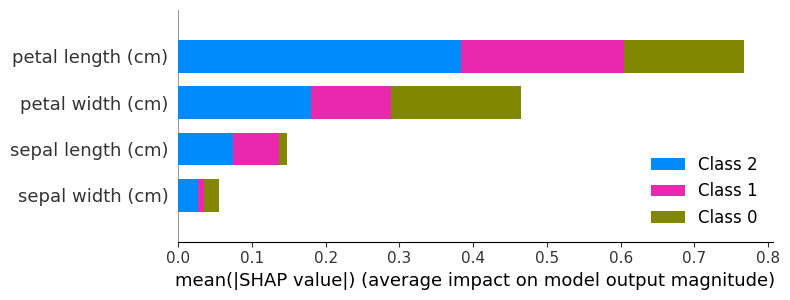

In [ ]:
# Model Interpretability with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
# Model Interpretability with LIME
explainer = LimeTabularExplainer( X_train, mode='classification',training_labels=y_train)
instance = X_test[0]
exp = explainer.explain_instance(instance, model.predict_proba)
exp.show_in_notebook()

KeyError: 0